In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
import pyro.distributions as dist

In [16]:
Ehigh = 4.3e9
Elow = 3.1e9
E_mean = (Ehigh + Elow)/2
E_var = 5e8

rhohigh = 1.15e3
rholow = 1.35e3
rho_theo = 1.24e3
rho_mean = (rhohigh + rholow)/2
rho_var = 1.24e2

etahigh = 0.26
etalow = 0.18
eta_theo = 0.2
eta_mean = (etahigh + etalow)/2
eta_var = 0.005

In [7]:
E_mean

3700000000.0

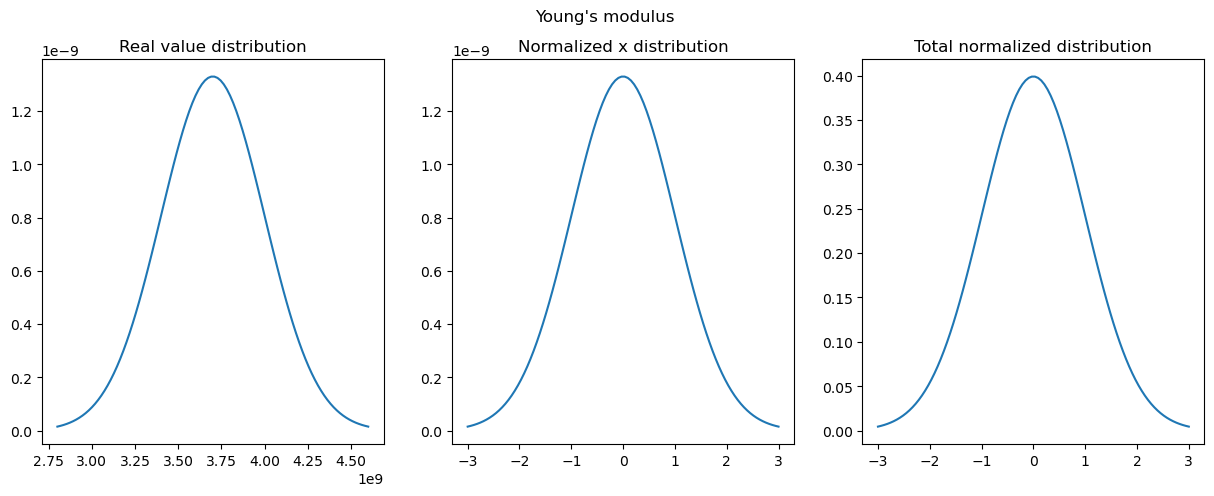

In [12]:
var = 3e8
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Young's modulus")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + E_mean
dist = stats.norm.pdf(x, E_mean, var)
plt.plot(x, dist)

var_norm = 3
x_norm = (x - E_mean) /var

plt.subplot(1,3,2)
plt.title("Normalized x distribution")
plt.plot(x_norm, dist)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm, dist * var)
#plt.xlim(Ehigh, Elow)

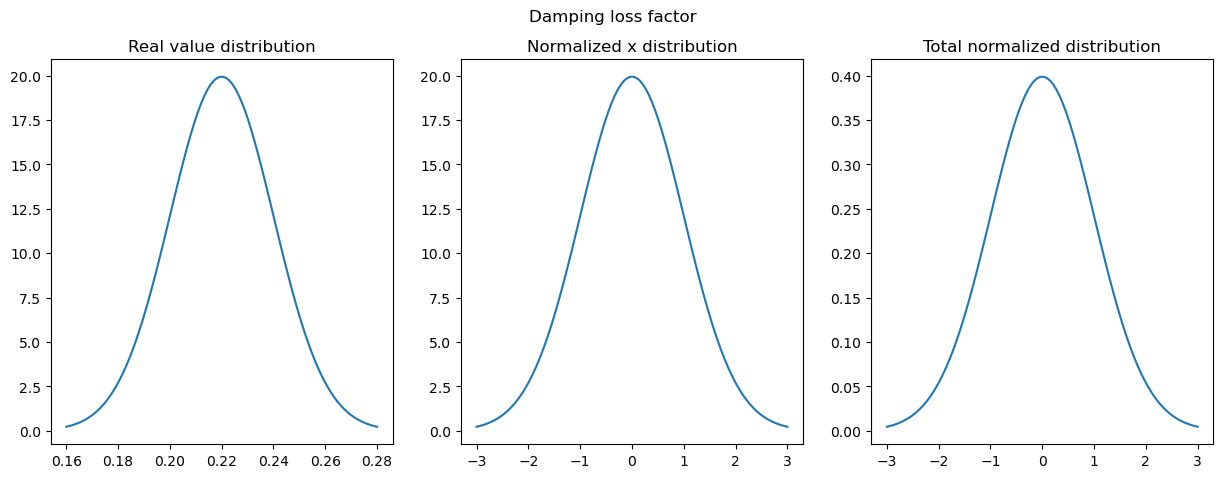

In [18]:
var = 0.02
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Damping loss factor")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + eta_mean
dist = stats.norm.pdf(x, eta_mean, var)
plt.plot(x, dist)

var_norm = 3
x_norm = (x - eta_mean) /var

plt.subplot(1,3,2)
plt.title("Normalized x distribution")
plt.plot(x_norm, dist)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm, dist * var)
#plt.xlim(Ehigh, Elow)

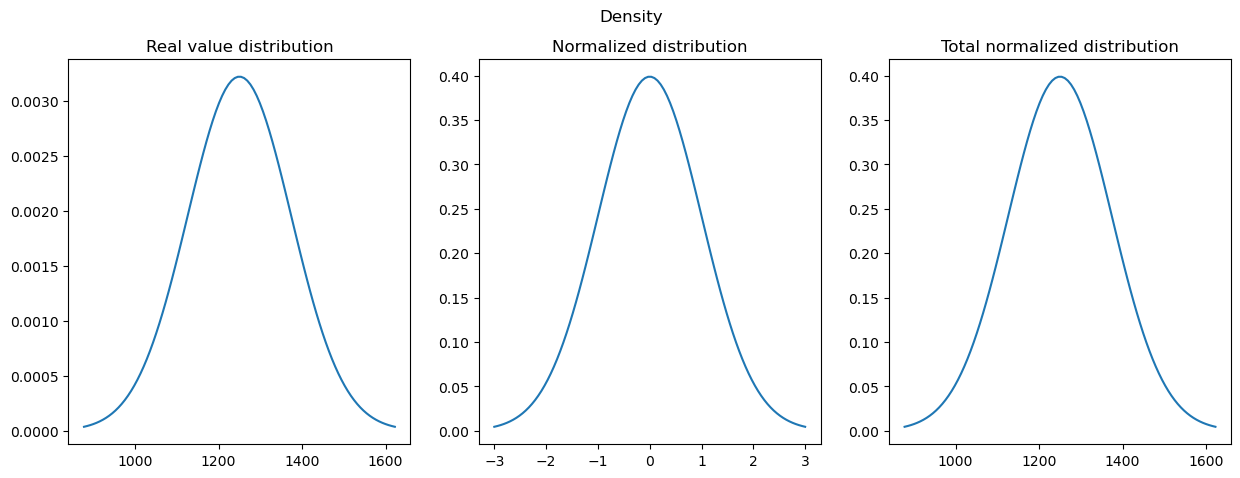

In [15]:
var = 1.24e2
#
# plt.plot(x, stats.norm.pdf(x, E_mean, var))
plt.figure(figsize=[15,5])
plt.suptitle("Density")

plt.subplot(1,3,1)
plt.title("Real value distribution")
x = np.linspace(- 3*var, 3*var, 100) + rho_mean
dist = stats.norm.pdf(x, rho_mean, var)
plt.plot(x, dist)

x_norm = (x - rho_mean) / var

plt.subplot(1,3,2)
plt.title("Normalized distribution")
plt.plot(x_norm, dist * var)

plt.subplot(1,3,3)
plt.title("Total normalized distribution")
plt.plot(x_norm*var+rho_mean, dist * var)
#plt.xlim(Ehigh, Elow)

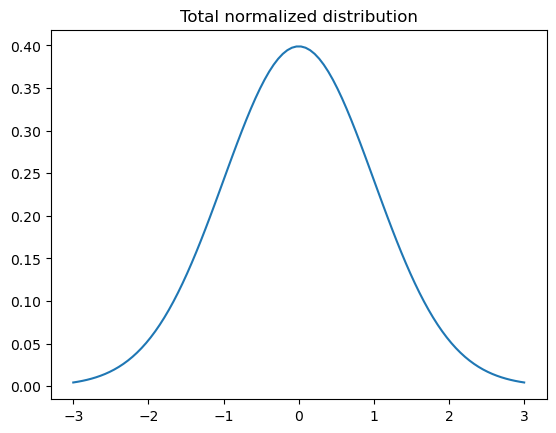

In [88]:

plt.plot()
plt.title("Total normalized distribution")
var=1
x = np.linspace(- 3*var, 3*var, 100)
plt.plot(x_norm, stats.norm.pdf(x, 0, var))

In [12]:
len(np.linspace(9.8e10, 1.1e11, 1000))

1000

In [19]:

def mobilityFuncModel(E_dist, rho_dist, eta_dist, freq, E_theo=10e10, rho_theo=8376, eta_theo=0.007):
    """
    Calculates the mobility value based on the Young's modulus(E) and the frequency
    Input: 
        E   : Young's modulus
        eta : loss factor
    Output: 
        Y   : Mobility value
    """
    beam = {"length": 0.301,
        "width": 0.026,
        "thickness": 0.003,
        
        "E": 10e10,
        
        "mass": 0.1877,
        
        }
    beam["massPerUnit"] = beam["mass"] / beam["length"]
    beam["volume"] = beam["length"] * beam["width"] * beam["thickness"]
    beam["I"] = beam["width"]*beam["thickness"]**3/12

    E = E_dist
    rho = rho_dist
    eta = eta_dist
    l = beam["length"]/2

    # calculating the bending wave number
    w = 2*np.pi*freq # Angular frequency
    B = E*beam["I"] #
    complex_B = E*(1+1j*eta)*beam["I"]
    massPerUnit = rho*beam["thickness"]*beam["width"]
    cb = np.sqrt(w)*(B/massPerUnit)**(1/4) # bending wave velocity
    
    kl = w/(cb)*l # bending wave number
    complex_kl = kl*(1-1j*eta/4)
    N_l = np.cos(complex_kl)*np.cosh(complex_kl) + 1
    D_l = np.cos(complex_kl)*np.sinh(complex_kl) + np.sin(complex_kl)*np.cosh(complex_kl)

    Y = -(1j*l)/ (2*complex_kl*np.sqrt(complex_B *massPerUnit)) * N_l/D_l
    return abs(Y)

result = np.zeros(10000)
E = np.linspace(5e10, 11e11, 10000)
for i in range(len(E)):
    result[i] = mobilityFuncModel(E[i], 8376, 0.007, 100)

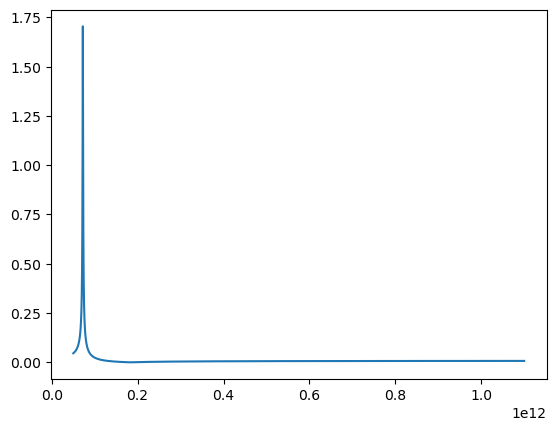

In [20]:
plt.plot(E, result)